### Car Evaluation Database
It is a multi-class classification problem. 
Task is to classify our dataset into **4 classes** : Unacceptable, Acceptable, Good, Very-Good.

### Independent variables 

 1. buying : buying price
 2. maint : maintenance price
 3. doors : number of doors
 4. persons : capacity in terms of persons to carry
 5. lug_boot : the size of luggage boot
 6. safety: estimated safety of the car
 
### Target Variable
 1. Class


In [1]:
### Importing the required libraries....

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
#### Loading the dataset ...

df = pd.read_csv('car_evaluation.csv')
print('Dimensions:',df.shape)
df.head()

Dimensions: (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA

In [3]:
### Getting abreif summary of the dataset ....
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [4]:
### Getting more info on the dataset ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Columns are categorical, check for unique values of each column

In [5]:
### All the columns are categorical, checking  for unique values of each column....

for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())
    

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [6]:
### Check how these unique categories are distributed among the columns

for i in df.columns:
    print(df[i].value_counts())
    print( )

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64

high     432
vhigh    432
low      432
med      432
Name: maint, dtype: int64

5more    432
3        432
2        432
4        432
Name: doors, dtype: int64

more    576
2       576
4       576
Name: persons, dtype: int64

big      576
small    576
med      576
Name: lug_boot, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [ ]:
### From the above output, it is clear that all the columns except 'class' are distributed equally among data.

<AxesSubplot:xlabel='class', ylabel='count'>

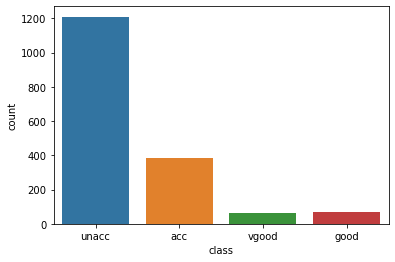

In [7]:
### Class Distribution:
sns.countplot(df['class'])

In [ ]:
### It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'...
## So, this is an unbalanced multiclass classification problem.

**Dummy encoding**

In [8]:
### Importing LabelEncoder : 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    
df.head()    

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


**Correlation matrix**

<AxesSubplot:>

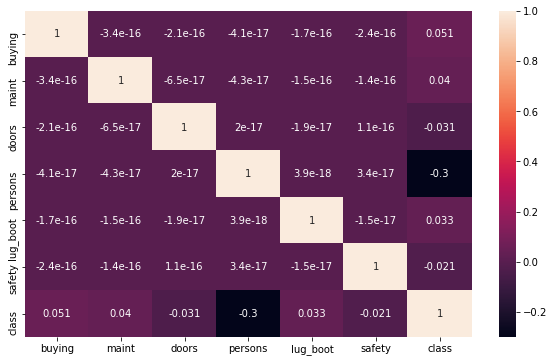

In [10]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
### Most of the columns show very weak correlation with 'class'...
## So, doing any analysis on them may not give any productive output.

In [11]:
### Creating features(x) and target(y) variables .... 

x=df[df.columns[:-1]]
y=df['class']

x.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [12]:
### From sklearn importing train test split, Splitting the data into x and y train & test sets...

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

## Model Selection

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### 1. Logistic Regression

In [14]:
### Creating an instance of Logistic Regression and fitting the data...

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [15]:
### Predictions:
y_pred = logreg.predict(xtest)

In [16]:
### Importing accuracy_score from Sklearn

from sklearn.metrics import accuracy_score
Model_accuracy = accuracy_score(y_pred,ytest)
print(Model_accuracy)

0.6647398843930635


In [17]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.18      0.30      0.22        70
           1       0.00      0.00      0.00         0
           2       0.90      0.73      0.81       442
           3       0.04      0.14      0.06         7

    accuracy                           0.66       519
   macro avg       0.28      0.29      0.27       519
weighted avg       0.79      0.66      0.72       519



In [ ]:
### Logistic regression model is giving very less accuracy, Let's check with other algorithms.

### 2. KNN Classifier


In [18]:
### Importing KNN from sklearn 

from sklearn.neighbors import KNeighborsClassifier

In [19]:
### Creating an instance of the KNN Classifier and fitting the data ...

KNN = KNeighborsClassifier(n_jobs=-1)
KNN.fit(xtrain,ytrain)
y_pred = KNN.predict(xtest)
KNN.score(xtest,ytest)

0.9017341040462428

In [20]:
### Classification Report : 
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



In [ ]:
### Accuracy(90%) can't be a fair criterion to evaluate unbalanced classification, so check 'f1-score'
## f1-score is 0.9 which is better than previous model

In [21]:
avg_score = []
for k in range(2,30):
    KNN = KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score = cross_val_score(KNN, xtrain, ytrain, cv=5, n_jobs=-1, scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'Accuracy')

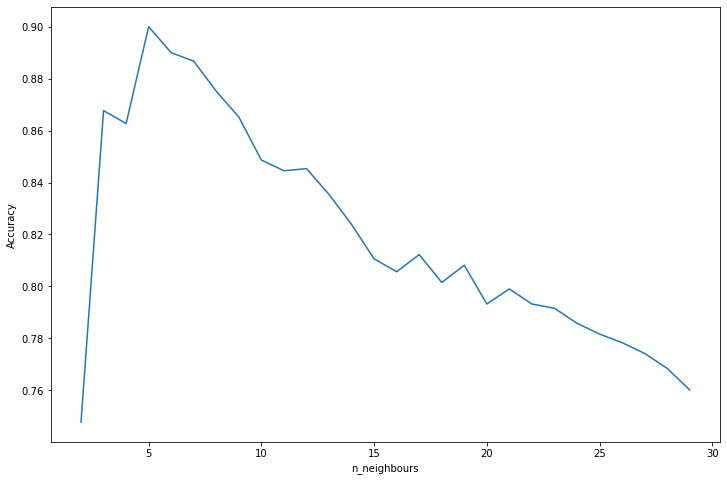

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
#plt.xticks(range(2,30,2))

In [ ]:
### So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.

In [ ]:
### So, with KNN Classification algorithm, you were able to achieve accuracy of 90%

### 3.Random Forests Classifier

In [23]:
### Importing RandomForest Classifier and f1_score ...

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [24]:
### Creating an instance of Random Forest and fitting the data ...

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
print(rfc.score(xtest,ytest))
print(f1_score(ytest,rfc.predict(xtest), average ='macro'))

0.9691714836223507
0.8944014319014318


In [ ]:
###  RFC is providing 96% Accuracy and f1_score of 0.89.

### You can even get higher accuracy for RFC with following parameters:
n_estimators: 50
criterion: entropy
max_depth: 10
max_features: 6
max_leaf_nodes: None

###Now, use XGBoost and compare the model performance and accuracy

# XGBoost Classifier :

In [25]:
### Importing svm and xgboost Classifier...

from sklearn import model_selection
from xgboost import XGBClassifier
clf = XGBClassifier

In [26]:
#### Creating an XGboost model with K fold cross validation and printing the result mean ....

k_fold = model_selection.KFold(n_splits = 10)
XGB = XGBClassifier(n_estimators = 100)
Result = model_selection.cross_val_score(XGB,xtrain,ytrain,cv = k_fold)
print('Accuracy:',Result.mean() )

[23:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
### thus XGBoost Classifier is giving 98% Accuracy ...